In [306]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
sns.set_theme(style="whitegrid")

In [307]:
df = pd.read_csv('dataset/covid19.csv',sep=',',
                 usecols=['PATIENT_TYPE','SEX','AGE','PNEUMONIA','COPD','ASTHMA','INMSUPR',
                          'HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','DIABETES','OBESITY','RENAL_CHRONIC',
                          'TOBACCO','CLASIFFICATION_FINAL','ICU','PREGNANT',"USMER","DATE_DIED","INTUBED"])
df.head(5)

,USMER,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In [308]:
# Select the people that get COVID19
df = df.loc[(df.CLASIFFICATION_FINAL < 4)] #Values 1-3 mean that the patient was diagnosed with covid in different degrees
df = df.loc[(df.USMER == 1) | (df.USMER == 2)]
df = df.loc[(df.SEX == 1) | (df.SEX == 2)]
df = df.loc[(df.PATIENT_TYPE == 1) | (df.PATIENT_TYPE == 2)]
df = df.loc[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df.loc[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df.loc[(df.COPD == 1) | (df.COPD == 2)]
df = df.loc[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df.loc[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df.loc[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df.loc[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df.loc[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df.loc[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df.loc[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df.loc[(df.TOBACCO == 1) | (df.TOBACCO == 2)]
df = df.loc[(df.ICU == 1) | (df.ICU == 2)]

print(df)

         USMER  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  AGE  \
2            2    2             2  09/06/2020        1          2   55   
5            2    1             2  9999-99-99        2          1   40   
8            2    1             2  9999-99-99        2          2   37   
9            2    1             2  9999-99-99        2          2   25   
11           2    2             2  9999-99-99        2          2   24   
...        ...  ...           ...         ...      ...        ...  ...   
1047913      1    2             2  9999-99-99        2          2   54   
1047919      1    2             2  9999-99-99        2          2   62   
1047928      1    1             2  9999-99-99        2          2   47   
1047929      1    2             2  9999-99-99        2          2   72   
1047933      1    1             2  9999-99-99        2          2   77   

         PREGNANT  DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  \
2              97         1     2       2  

In [309]:
df.SEX = df.SEX.apply(lambda x: x if x == 1 else 0)  
df.USMER = df.USMER.apply(lambda x: x if x == 1 else 0)                     # no = 0, yes = 1
df.PATIENT_TYPE = df.PATIENT_TYPE.apply(lambda x: 0 if x == 1 else 1)     
df.PNEUMONIA = df.PNEUMONIA.apply(lambda x: x if x == 1 else 0)           
df.DIABETES = df.DIABETES.apply(lambda x: x if x == 1 else 0)             
df.COPD = df.COPD.apply(lambda x: x if x == 1 else 0)                     
df.ASTHMA = df.ASTHMA.apply(lambda x: x if x == 1 else 0)                 
df.INMSUPR = df.INMSUPR.apply(lambda x: x if x == 1 else 0)               
df.HIPERTENSION = df.HIPERTENSION.apply(lambda x: x if x == 1 else 0)     
df.OTHER_DISEASE = df.OTHER_DISEASE.apply(lambda x: x if x == 1 else -0)  
df.CARDIOVASCULAR = df.CARDIOVASCULAR.apply(lambda x: x if x == 1 else 0) 
df.OBESITY = df.OBESITY.apply(lambda x: x if x == 1 else 0)               
df.RENAL_CHRONIC = df.RENAL_CHRONIC.apply(lambda x: x if x == 1 else 0)   
df.TOBACCO = df.TOBACCO.apply(lambda x: x if x == 1 else 0)               
df.DATE_DIED = df.DATE_DIED.apply(lambda x: 0 if x == "9999-99-99" else 1)
df.PREGNANT = df.PREGNANT.apply(lambda x: x if x == 1 else 0)           
df.INTUBED = df.INTUBED.apply(lambda x: x if x == 1 else 0)                   
df.ICU = df.ICU.apply(lambda x: x if x == 1 else 0)

print(df)

         USMER  SEX  PATIENT_TYPE  DATE_DIED  INTUBED  PNEUMONIA  AGE  \
2            0    0             1          1        1          0   55   
5            0    1             1          0        0          1   40   
8            0    1             1          0        0          0   37   
9            0    1             1          0        0          0   25   
11           0    0             1          0        0          0   24   
...        ...  ...           ...        ...      ...        ...  ...   
1047913      1    0             1          0        0          0   54   
1047919      1    0             1          0        0          0   62   
1047928      1    1             1          0        0          0   47   
1047929      1    0             1          0        0          0   72   
1047933      1    1             1          0        0          0   77   

         PREGNANT  DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  \
2               0         1     0       0        0     

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108273 entries, 2 to 1047933
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   USMER                 108273 non-null  int64
 1   SEX                   108273 non-null  int64
 2   PATIENT_TYPE          108273 non-null  int64
 3   DATE_DIED             108273 non-null  int64
 4   INTUBED               108273 non-null  int64
 5   PNEUMONIA             108273 non-null  int64
 6   AGE                   108273 non-null  int64
 7   PREGNANT              108273 non-null  int64
 8   DIABETES              108273 non-null  int64
 9   COPD                  108273 non-null  int64
 10  ASTHMA                108273 non-null  int64
 11  INMSUPR               108273 non-null  int64
 12  HIPERTENSION          108273 non-null  int64
 13  OTHER_DISEASE         108273 non-null  int64
 14  CARDIOVASCULAR        108273 non-null  int64
 15  OBESITY               108273 non-

In [311]:
df = df.replace([97, 99], np.nan)
df.head()

,USMER,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
2,0,0,1,1,1,0,55.0,0,1,0,0,0,0,0,0,0,0,0,3,0
5,0,1,1,0,0,1,40.0,0,0,0,0,0,0,0,0,0,0,0,3,0
8,0,1,1,0,0,0,37.0,0,1,0,0,0,1,0,0,1,0,0,3,0
9,0,1,1,0,0,0,25.0,0,0,0,0,0,0,0,0,0,0,0,3,0
11,0,0,1,0,0,0,24.0,0,0,0,0,0,0,0,0,0,0,0,3,0


In [312]:
df = df.reset_index()
print(df)

          index  USMER  SEX  PATIENT_TYPE  DATE_DIED  INTUBED  PNEUMONIA  \
0             2      0    0             1          1        1          0   
1             5      0    1             1          0        0          1   
2             8      0    1             1          0        0          0   
3             9      0    1             1          0        0          0   
4            11      0    0             1          0        0          0   
...         ...    ...  ...           ...        ...      ...        ...   
108268  1047913      1    0             1          0        0          0   
108269  1047919      1    0             1          0        0          0   
108270  1047928      1    1             1          0        0          0   
108271  1047929      1    0             1          0        0          0   
108272  1047933      1    1             1          0        0          0   

         AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  \
0       55.0   

In [313]:
df['AT_RISK'] = df['DATE_DIED'] + df['INTUBED'] + df['ICU']
df.AT_RISK = df.AT_RISK.apply(lambda x: 1 if x > 0 else 0) 

# Drop a few columns which are intuitively not longer useful
df.drop(columns = ['CLASIFFICATION_FINAL', 'INTUBED', 'ICU','index'], inplace=True)

In [314]:
print(df)

        USMER  SEX  PATIENT_TYPE  DATE_DIED  PNEUMONIA   AGE  PREGNANT  \
0           0    0             1          1          0  55.0         0   
1           0    1             1          0          1  40.0         0   
2           0    1             1          0          0  37.0         0   
3           0    1             1          0          0  25.0         0   
4           0    0             1          0          0  24.0         0   
...       ...  ...           ...        ...        ...   ...       ...   
108268      1    0             1          0          0  54.0         0   
108269      1    0             1          0          0  62.0         0   
108270      1    1             1          0          0  47.0         0   
108271      1    0             1          0          0  72.0         0   
108272      1    1             1          0          0  77.0         0   

        DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0              1     0       0        0

In [315]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108273 entries, 0 to 108272
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   USMER           108273 non-null  int64  
 1   SEX             108273 non-null  int64  
 2   PATIENT_TYPE    108273 non-null  int64  
 3   DATE_DIED       108273 non-null  int64  
 4   PNEUMONIA       108273 non-null  int64  
 5   AGE             108228 non-null  float64
 6   PREGNANT        108273 non-null  int64  
 7   DIABETES        108273 non-null  int64  
 8   COPD            108273 non-null  int64  
 9   ASTHMA          108273 non-null  int64  
 10  INMSUPR         108273 non-null  int64  
 11  HIPERTENSION    108273 non-null  int64  
 12  OTHER_DISEASE   108273 non-null  int64  
 13  CARDIOVASCULAR  108273 non-null  int64  
 14  OBESITY         108273 non-null  int64  
 15  RENAL_CHRONIC   108273 non-null  int64  
 16  TOBACCO         108273 non-null  int64  
 17  AT_RISK   

#### Question 1
Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc; that get COVID-19 and have 'DIABETES'. Construct 95% confidence intervals for the difference between the mean 'DEATH FOR COVID-19' for females and for males within each age band.



In [106]:
# NO POOLED

for val in [[18, 28], [29, 38], [39, 48], [49, 58], [59, 68], [69, 78], [79, 88],[89, 98],[99, 108]]:
    df_year_band = df[(df['AGE'] >= val[0]) & (df['AGE'] <= val[1])]
    df_year_band.reset_index(inplace=True, drop=True)
    
    
    Female_COVID_died = df_year_band[(df_year_band['SEX'] == 1) & (df_year_band['DIABETES'] == 1)]['DATE_DIED']
    Male_COVID_died = df_year_band[(df_year_band['SEX'] == 0) & (df_year_band['DIABETES'] == 1)]['DATE_DIED']

    Female_COVID_died.reset_index(inplace = True, drop = True)
    Male_COVID_died.reset_index(inplace = True, drop = True)
    
    print("Std Females that died with COVID-19: ", np.std(Female_COVID_died))
    print("Std Males that died with COVID-19: ", np.std(Male_COVID_died))
    print("Variance Ratio: ", (np.std(Female_COVID_died)**2)/(np.std(Male_COVID_died)**2))
    print("_________________________________________________________")

Std Females that died with COVID-19:  0.4413104493478833
Std Males that died with COVID-19:  0.46659661630122223
Variance Ratio:  0.8945513007390763
_________________________________________________________
Std Females that died with COVID-19:  0.46050091833651924
Std Males that died with COVID-19:  0.4677000351222916
Variance Ratio:  0.9694517438180554
_________________________________________________________
Std Females that died with COVID-19:  0.4794477165084547
Std Males that died with COVID-19:  0.48989794855663565
Variance Ratio:  0.9577921369382145
_________________________________________________________
Std Females that died with COVID-19:  0.49637344653945265
Std Males that died with COVID-19:  0.4997869833382368
Variance Ratio:  0.9863866818770283
_________________________________________________________
Std Females that died with COVID-19:  0.49932031029759616
Std Males that died with COVID-19:  0.49307695748911784
Variance Ratio:  1.0254843770653368
______________________

In [105]:
# POOLED

for val in [[18, 28], [29, 38], [39, 48], [49, 58], [59, 68], [69, 78], [79, 88],[89, 98],[99, 108]]:
    df_year_band = df[(df['AGE'] >= val[0]) & (df['AGE'] <= val[1])]
    df_year_band.reset_index(inplace=True, drop=True)
    
    
    Female_COVID_died = df_year_band[(df_year_band['SEX'] == 1) & (df_year_band['DIABETES'] == 1)]['DATE_DIED']
    Male_COVID_died = df_year_band[(df_year_band['SEX'] == 0) & (df_year_band['DIABETES'] == 1)]['DATE_DIED']

    Female_COVID_died.reset_index(inplace = True, drop = True)
    Male_COVID_died.reset_index(inplace = True, drop = True)
    
    Female_temp = sm.stats.DescrStatsW(Female_COVID_died)
    Male_temp = sm.stats.DescrStatsW(Male_COVID_died)
    
    cm = sm.stats.CompareMeans(Male_temp,Female_temp)
    lower, upper = cm.tconfint_diff(usevar='pooled') 
    
    print(val)
    print("pooled: ", lower, ",", upper)
    print("pooled diff: ", abs(upper) - abs(lower))
    print('-----------------------------------------------------')
    print("_________________________________________________________")


[18, 28]
pooled:  -0.05967268312774217 , 0.17038315321321224
pooled diff:  0.11071047008547007
-----------------------------------------------------
_________________________________________________________
[29, 38]
pooled:  -0.03514570365656239 , 0.0711127763672948
pooled diff:  0.035967072710732406
-----------------------------------------------------
_________________________________________________________
[39, 48]
pooled:  0.012213812706116507 , 0.07154585415884489
pooled diff:  0.059332041452728385
-----------------------------------------------------
_________________________________________________________
[49, 58]
pooled:  0.02422743525125782 , 0.0668086452725265
pooled diff:  0.04258121002126868
-----------------------------------------------------
_________________________________________________________
[59, 68]
pooled:  0.037363444728795076 , 0.07634517418631956
pooled diff:  0.03898172945752448
-----------------------------------------------------
________________________

#### Question 2
Construct 95% confidence intervals for the proportion of smokers that died by COVID-19 who are female, and for the proportion of smokers who are male. Then construct a 95% confidence interval for the difference between these proportions.


In [147]:
# Select in the dataset the colums that you need to analyse

Female_SMOKE_COVID_died = df[(df['SEX'] == 1) & (df['TOBACCO'] == 1)]['DATE_DIED']
Female_SMOKE_COVID_died.reset_index(inplace=True,drop=True)

Male_SMOKE_COVID_died = df[(df['SEX'] == 0) & (df['TOBACCO'] == 1)]['DATE_DIED']
Male_SMOKE_COVID_died.reset_index(inplace=True,drop=True)

In [148]:
SMOKE_COVID_died = df[(df['TOBACCO'] == 1)]['DATE_DIED']
n_smokers_covid = sum(SMOKE_COVID_died == 1)
print(n_smokers_covid)

3883


In [149]:
# Count the number of females that smoke and died by COVID-19, and females that do not die by COVID-19
print(sum(Female_SMOKE_COVID_died==1), ",", sum(Female_SMOKE_COVID_died!=1)) 
n_female_smokers_covid = sum(Female_SMOKE_COVID_died==1)

628 , 996


In [150]:
# Count the number of males that smoke and died By COVID-19, and males that do not die by COVID-19
print(sum(Male_SMOKE_COVID_died==1), ",", sum(Male_SMOKE_COVID_died!=1))
n_male_smokers_covid = sum(Male_SMOKE_COVID_died==1)

3255 , 3568


In [56]:
#Proportion (%) of Male that smoke and died due to COIVD19
proportion_male_smoke_covid = sum(Male_SMOKE_COVID_died==1)/len(Male_SMOKE_COVID_died)
print(proportion_male_smoke_covid)

0.477062875567932


In [57]:
#Proportion (%) of Female that smoke and died due to COIVD19
proportion_female_smoke_covid =sum(Female_SMOKE_COVID_died==1)/len(Female_SMOKE_COVID_died)
print(proportion_female_smoke_covid)

0.3866995073891626


In [58]:
# Standar error (se) of proportion of male
se_male_smoke_covid = np.sqrt((proportion_male_smoke_covid*(1-proportion_male_smoke_covid))/n_male_smokers_covid )
print(se_male_smoke_covid )

0.008754614992272067


In [59]:
# Standar error (se) of proportion of female
se_female_smoke_covid = np.sqrt((proportion_female_smoke_covid*(1-proportion_female_smoke_covid))/n_female_smokers_covid )
print(se_female_smoke_covid )

0.019433169751304803


In [60]:
print('Lower Boundary Male: ', proportion_male_smoke_covid-1.96*se_male_smoke_covid)
print('Upper Boundary Male: ', proportion_male_smoke_covid+1.96*se_male_smoke_covid)

Lower Boundary Male:  0.45990383018307873
Upper Boundary Male:  0.4942219209527852


In [61]:
print('Lower Boundary Male: ', proportion_female_smoke_covid-1.96*se_female_smoke_covid)
print('Upper Boundary Male: ', proportion_female_smoke_covid+1.96*se_female_smoke_covid)

Lower Boundary Male:  0.34861049467660515
Upper Boundary Male:  0.42478852010172


In [62]:
ci_low_male, ci_upp_male = proportion_confint(n_male_smokers_covid, n_smokers_covid, alpha=0.05, method='normal')
ci_low_male, ci_upp_male

(0.8266882123631253, 0.849850546328608)

In [63]:
ci_upp_male - ci_low_male 

0.02316233396548273

In [64]:
ci_low_female, ci_upp_female = proportion_confint(n_female_smokers_covid, n_smokers_covid, alpha=0.05, method='normal')
ci_low_female, ci_upp_female

(0.1501494536713921, 0.17331178763687471)

In [65]:
ci_upp_female - ci_low_female 

0.023162333965482618

Diference of proportions that smokers and dead by COVID 19 between male ann female

In [66]:
proportion_smokers_gender_covid_diff = proportion_male_smoke_covid - proportion_female_smoke_covid
proportion_smokers_gender_covid_diff

0.09036336817876939

In [67]:
se_proportion_smokers_covid_diff = np.sqrt((se_male_smoke_covid**2)+(se_female_smoke_covid**2))
se_proportion_smokers_covid_diff

0.021314111997593116

In [68]:
print('Lower Boundary Gender Difference: ', proportion_smokers_gender_covid_diff-1.96*se_proportion_smokers_covid_diff)
print('Upper Boundary Gender Difference: ', proportion_smokers_gender_covid_diff+1.96*se_proportion_smokers_covid_diff)


Lower Boundary Gender Difference:  0.048587708663486884
Upper Boundary Gender Difference:  0.1321390276940519


In [69]:
0.1321390276940519 - 0.048587708663486884

0.08355131903056501

Q2a. Discuss why it may be relevant to report the proportions of smokers who are female and male, and contrast this to reporting the proportions of males and females who smoke and died by COVID-19.

It is important to find the proportion of smokers and people that died by COVID-19 who are female vs proportion of smokers who are male in order to compare the two genders. The proportion of smokers who are male is higher than the proportion of smokers who are female. 82% to 84% of smokers are male while 15% to 17% of smokers are female.

Q2b. How does the width of the confidence interval for the difference of the two proportions compare to the widths of the confidence intervals for each proportion separately?

The confidence interval for the difference of the two proportions is wider than the confidence intervals for each proportion separately.

#### Question 3
Construct a 95% confidence interval for the mean difference between the average age of a diabetes, and the average age of a no diabetes, that died by COVID-19.

In [91]:
diabetes_age_covid = df[(df['DIABETES'] == 1) & (df['DATE_DIED'] == 1)]['AGE']
diabetes_age_covid = diabetes_age_covid[~diabetes_age_covid.isna()]
diabetes_age_covid.reset_index(inplace=True,drop=True)
print(diabetes_age_covid)

no_diabetes_age_covid = df[(df['DIABETES'] == 0) & (df['DATE_DIED'] == 1)]['AGE']
no_diabetes_age_covid = no_diabetes_age_covid[~no_diabetes_age_covid.isna()]
no_diabetes_age_covid.reset_index(inplace=True,drop=True)
print(no_diabetes_age_covid)


0        55.0
1        88.0
2        60.0
3        42.0
4        74.0
         ... 
17880    71.0
17881    66.0
17882    81.0
17883    85.0
17884    57.0
Name: AGE, Length: 17885, dtype: float64
0        47.0
1        43.0
2        86.0
3        53.0
4        90.0
         ... 
29277    77.0
29278    65.0
29279    79.0
29280    73.0
29281    80.0
Name: AGE, Length: 29282, dtype: float64


In [92]:
diabetes_age_covid_temp = sm.stats.DescrStatsW(diabetes_age_covid)
print(diabetes_age_covid_temp)

no_diabetes_age_covid_temp = sm.stats.DescrStatsW(no_diabetes_age_covid)
print(no_diabetes_age_covid_temp)

cm = sm.stats.CompareMeans(diabetes_age_covid_temp, no_diabetes_age_covid_temp)
lower, upper = cm.tconfint_diff(usevar='pooled')
print("pooled: ", lower, ",", upper)


pooled:  2.003772273866725 , 2.5273437703102863


Q6a. Use graphical and numerical techniques to compare the variation in the ages of diabetic to the variation in the ages of non-diabetic that died by COVID-19.

In [93]:
diabetes_age_covid.describe()

count    17885.000000
mean        63.027733
std         12.097314
min          0.000000
25%         55.000000
50%         63.000000
75%         71.000000
max        100.000000
Name: AGE, dtype: float64

In [94]:
no_diabetes_age_covid.describe()

count    29282.000000
mean        60.762175
std         15.154760
min          0.000000
25%         51.000000
50%         61.000000
75%         72.000000
max        101.000000
Name: AGE, dtype: float64

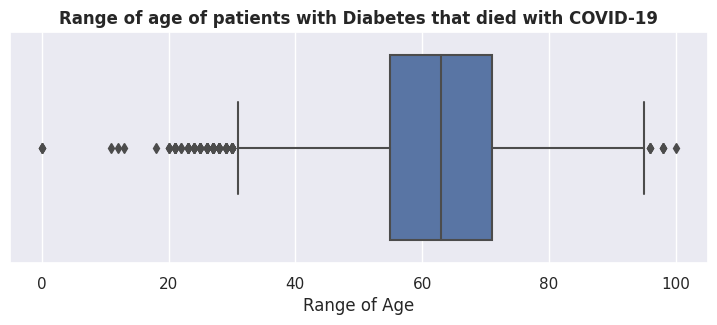

In [303]:
plt.figure(figsize = (9,3))

ax = sns.boxplot(x=diabetes_age_covid)
for bars in ax.containers:
    ax.bar_label(bars)
    
#plt.xlabel("")
plt.xlabel("Range of Age") 
plt.title("Range of age of patients with Diabetes that died with COVID-19", fontsize = 12,fontweight ='bold');

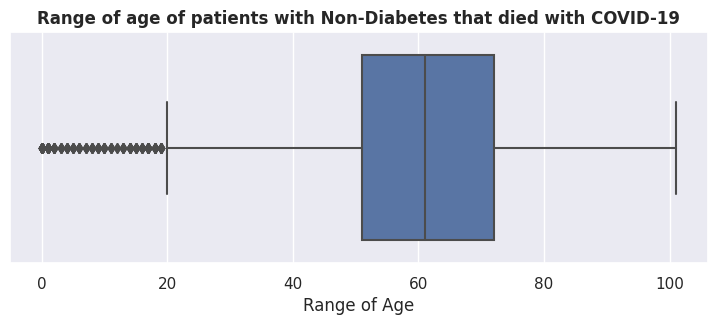

In [305]:
plt.figure(figsize = (9,3))

ax = sns.boxplot(x=no_diabetes_age_covid)
for bars in ax.containers:
    ax.bar_label(bars)
    
#plt.xlabel("")
plt.xlabel("Range of Age") 
plt.title("Range of age of patients with Non-Diabetes that died with COVID-19", fontsize = 12,fontweight ='bold');

#### Question 4

Select the sample that get COVID-19 and have DIABETES  

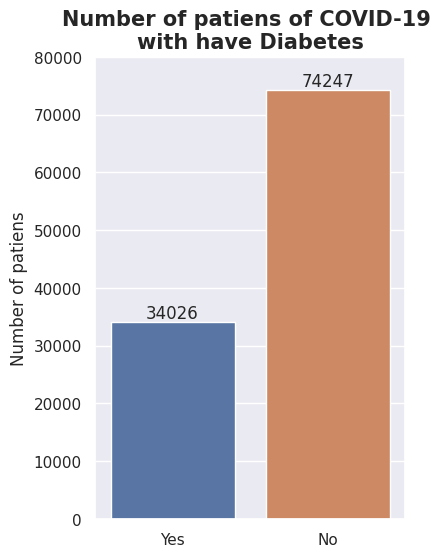

In [288]:
df.DIABETES = df.DIABETES.replace([1], str("Yes"))
df.DIABETES = df.DIABETES.replace([0], str("No"))

sns.set_theme(style="darkgrid")
plt.figure(figsize = (4,6))


ax = sns.countplot(x=df["DIABETES"],order=("Yes","No"))
for bars in ax.containers:
    ax.bar_label(bars)
    

ax.set_ylim(0., 80000)
plt.xlabel("")
plt.ylabel("Number of patiens") 
plt.title("Number of patiens of COVID-19 \nwith have Diabetes", fontsize = 15,fontweight ='bold');

Select the sample that get COVID-19 and have Pneumonia  

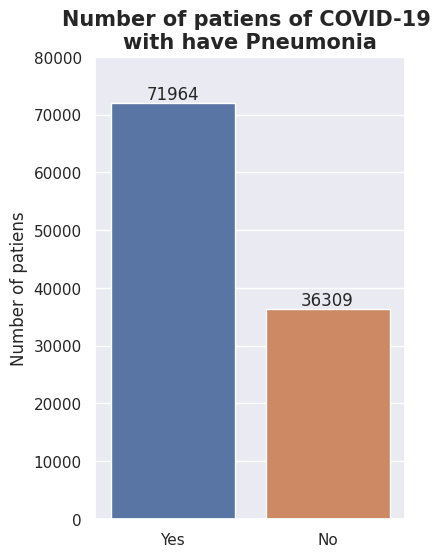

In [287]:
df.PNEUMONIA = df.PNEUMONIA.replace([1], str("Yes"))
df.PNEUMONIA = df.PNEUMONIA.replace([0], str("No"))

sns.set_theme(style="darkgrid")
plt.figure(figsize = (4,6))


ax = sns.countplot(x=df["PNEUMONIA"],order=("Yes","No"))
for bars in ax.containers:
    ax.bar_label(bars)
    

ax.set_ylim(0., 80000)
plt.xlabel("")
plt.ylabel("Number of patiens") 
plt.title("Number of patiens of COVID-19 \nwith have Pneumonia", fontsize = 15,fontweight ='bold');

Select the sample that get COVID-19 and have ASTHMA 

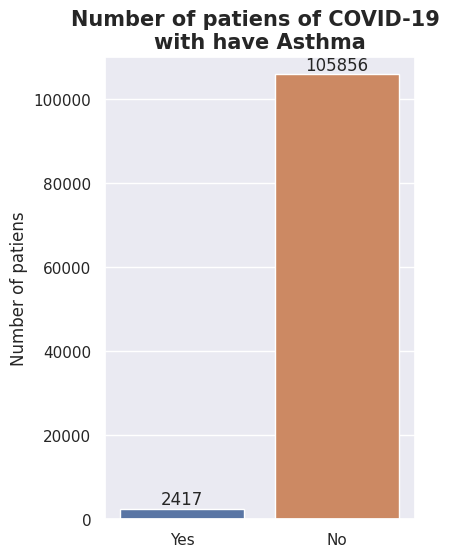

In [276]:
df.ASTHMA = df.ASTHMA.replace([1], str("Yes"))
df.ASTHMA = df.ASTHMA.replace([0], str("No"))

sns.set_theme(style="darkgrid")
plt.figure(figsize = (4,6))


ax = sns.countplot(x=df["ASTHMA"],order=("Yes","No"))
for bars in ax.containers:
    ax.bar_label(bars)
    

ax.set_ylim(0., 110000)
plt.xlabel("")
plt.ylabel("Number of patiens") 
plt.title("Number of patiens of COVID-19 \nwith have Asthma", fontsize = 15,fontweight ='bold');

Select the sample that get COVID-19 and have Obesity

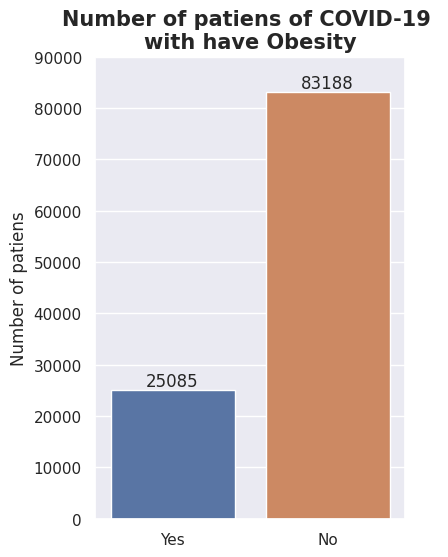

In [277]:
df.OBESITY = df.OBESITY.replace([1], str("Yes"))
df.OBESITY = df.OBESITY.replace([0], str("No"))

sns.set_theme(style="darkgrid")
plt.figure(figsize = (4,6))


ax = sns.countplot(x=df["OBESITY"],order=("Yes","No"))
for bars in ax.containers:
    ax.bar_label(bars)
    

ax.set_ylim(0., 90000)
plt.xlabel("")
plt.ylabel("Number of patiens") 
plt.title("Number of patiens of COVID-19 \nwith have Obesity", fontsize = 15,fontweight ='bold');

Select the sample that get COVID-19 and have HIPERTENSION 

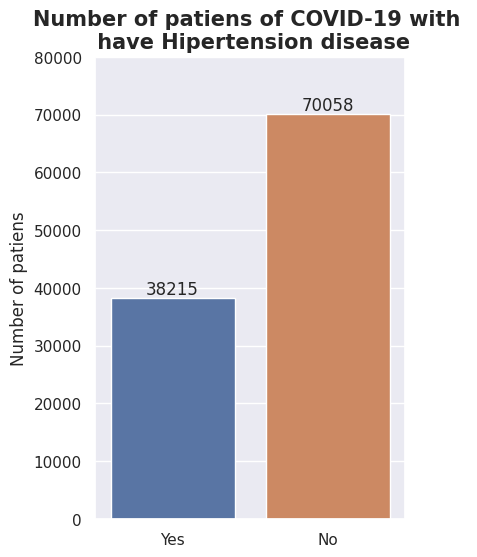

In [278]:
df.HIPERTENSION = df.HIPERTENSION.replace([1], str("Yes"))
df.HIPERTENSION = df.HIPERTENSION.replace([0], str("No"))

sns.set_theme(style="darkgrid")
plt.figure(figsize = (4,6))


ax = sns.countplot(x=df["HIPERTENSION"],order=("Yes","No"))
for bars in ax.containers:
    ax.bar_label(bars)
    

ax.set_ylim(0., 80000)
plt.xlabel("")
plt.ylabel("Number of patiens") 
plt.title("Number of patiens of COVID-19 with \n have Hipertension disease", fontsize = 15,fontweight ='bold');

Select the sample that get COVID-19 and have CARDIOVASCULAR

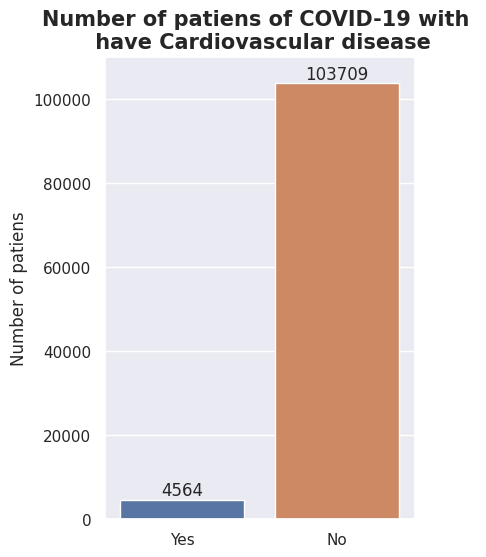

In [279]:
df.CARDIOVASCULAR = df.CARDIOVASCULAR.replace([1], str("Yes"))
df.CARDIOVASCULAR = df.CARDIOVASCULAR.replace([0], str("No"))

sns.set_theme(style="darkgrid")
plt.figure(figsize = (4,6))


ax = sns.countplot(x=df["CARDIOVASCULAR"],order=("Yes","No"))
for bars in ax.containers:
    ax.bar_label(bars)
    

ax.set_ylim(0., 110000)
plt.xlabel("")
plt.ylabel("Number of patiens") 
plt.title("Number of patiens of COVID-19 with \n have Cardiovascular disease", fontsize = 15,fontweight ='bold');


Select the sample that get COVID-19 and have OTHER_DISEASE

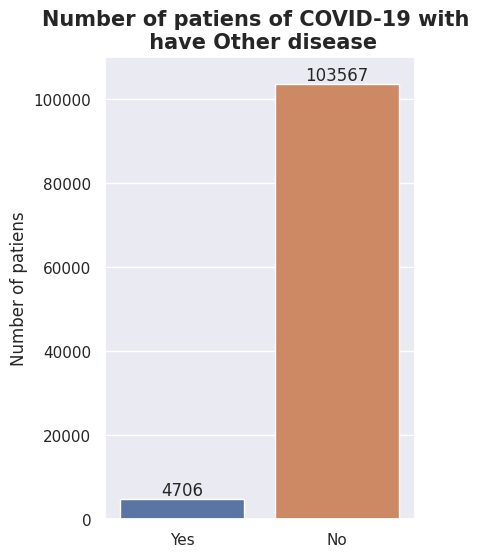

In [280]:
df.OTHER_DISEASE = df.OTHER_DISEASE.replace([1], str("Yes"))
df.OTHER_DISEASE = df.OTHER_DISEASE.replace([0], str("No"))

sns.set_theme(style="darkgrid")
plt.figure(figsize = (4,6))


ax = sns.countplot(x=df["OTHER_DISEASE"],order=("Yes","No"))
for bars in ax.containers:
    ax.bar_label(bars)
    

ax.set_ylim(0., 110000)
plt.xlabel("")
plt.ylabel("Number of patiens") 
plt.title("Number of patiens of COVID-19 with \n have Other disease", fontsize = 15,fontweight ='bold');

Select the sample that get COVID-19 and have RENAL_CHRONIC

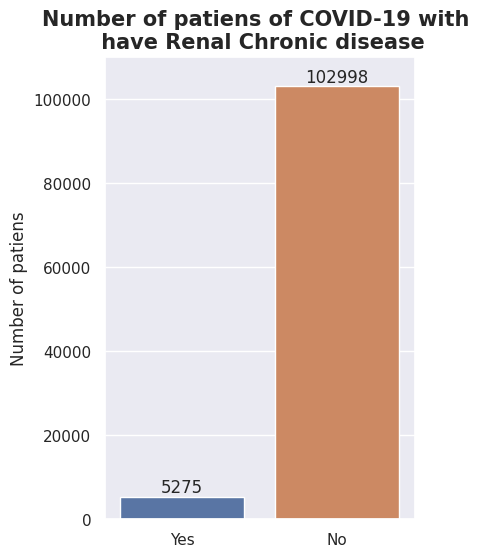

In [281]:
df.RENAL_CHRONIC = df.RENAL_CHRONIC.replace([1], str("Yes"))
df.RENAL_CHRONIC = df.RENAL_CHRONIC.replace([0], str("No"))

sns.set_theme(style="darkgrid")
plt.figure(figsize = (4,6))


ax = sns.countplot(x=df["RENAL_CHRONIC"],order=("Yes","No"))
for bars in ax.containers:
    ax.bar_label(bars)
    

ax.set_ylim(0., 110000)
plt.xlabel("")
plt.ylabel("Number of patiens") 
plt.title("Number of patiens of COVID-19 with \n have Renal Chronic disease", fontsize = 15,fontweight ='bold');

#### Question 5
Indicates the number of confirmed and unconfirmed covid cases.

In [238]:
get_COVID19 = pd.read_csv('dataset/covid19.csv',sep=',',
                 usecols=['CLASIFFICATION_FINAL',"DATE_DIED"])
get_COVID19.head(5)

get_COVID19.DATE_DIED = get_COVID19.DATE_DIED.apply(lambda x: 0 if x == "9999-99-99" else 1)
get_COVID19.CLASIFFICATION_FINAL.value_counts()

7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64

In [239]:
get_COVID19.CLASIFFICATION_FINAL = get_COVID19.CLASIFFICATION_FINAL.replace([1,2,3], str("Yes"))
get_COVID19.CLASIFFICATION_FINAL = get_COVID19.CLASIFFICATION_FINAL.replace([4,5,6,7], str("No"))

In [242]:
get_COVID19.CLASIFFICATION_FINAL.value_counts()

No     656596
Yes    391979
Name: CLASIFFICATION_FINAL, dtype: int64

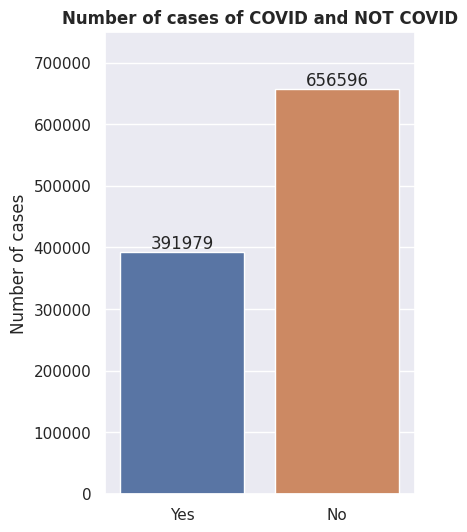

In [282]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (4,6))


ax = sns.countplot(x="CLASIFFICATION_FINAL", data=get_COVID19)
for bars in ax.containers:
    ax.bar_label(bars)
    

ax.set_ylim(0., 750000)
plt.xlabel("")
plt.ylabel("Number of cases") 
plt.title("Number of cases of COVID and NOT COVID", fontsize = 12,fontweight ='bold');

#### Question 6
Restrinja la muestra a mujeres de entre 40 y 65 años y, a continuación, utilice los antecedentes de neumonía por enfermedad respiratoria para dividir esta muestra en dos grupos: mujeres que padecen neumonía ["PNEUMONIA"]en la actualidad y mujeres que no la padecen.  Dentro de cada uno de estos grupos, calcule la proporción de mujeres que murieron por COVID-19 ["DATE_DIED"].  Calcule intervalos de confianza del 95% para cada una de estas proporciones.

Women between 40 - 65 years with PNEUMONIA and died with COVID-19.

In [325]:
Female_40_65 = df[(df['SEX'] == 1) & (df['AGE'] >= 40) & (df['AGE'] <= 65)]
Female_40_65.reset_index(inplace = True, drop = True)
print(Female_40_65)

Female_40_65_PNEUMONIA = Female_40_65[Female_40_65['PNEUMONIA']==1]
Female_40_65_PNEUMONIA.reset_index(inplace = True, drop =  True)
print(Female_40_65_PNEUMONIA)

       USMER  SEX  PATIENT_TYPE  DATE_DIED  PNEUMONIA   AGE  PREGNANT  \
0          0    1             1          0          1  40.0         0   
1          1    1             1          1          0  53.0         0   
2          1    1             1          1          1  61.0         0   
3          0    1             1          1          1  62.0         0   
4          1    1             1          1          1  58.0         0   
...      ...  ...           ...        ...        ...   ...       ...   
22333      1    1             1          0          0  65.0         0   
22334      1    1             1          0          0  62.0         0   
22335      1    1             1          0          1  60.0         0   
22336      1    1             1          0          0  53.0         0   
22337      1    1             1          0          0  47.0         0   

       DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0             0     0       0        0             0

In [327]:
prop_female_40_65_died_covid19 = sum(Female_40_65_PNEUMONIA['DATE_DIED'] == 1) / len(Female_40_65_PNEUMONIA)
print(prop_female_40_65_died_covid19)

0.4385820844453569


In [328]:
se_PNEUMONIA_died_covid19 = prop_female_40_65_died_covid19 * (1 - prop_female_40_65_died_covid19)
se_PNEUMONIA_died_covid19

0.2462278396489227

In [329]:
n_NEUMONIA_died_covid19 = len(Female_40_65_PNEUMONIA['DATE_DIED'])
n_NEUMONIA_died_covid19

14613

In [330]:
ci_low = (prop_female_40_65_died_covid19  - 1.96 * np.sqrt((se_PNEUMONIA_died_covid19 / n_NEUMONIA_died_covid19)))
ci_upp = (prop_female_40_65_died_covid19  + 1.96 * np.sqrt((se_PNEUMONIA_died_covid19 / n_NEUMONIA_died_covid19)))
print('Lower Boundary: ', prop_female_40_65_died_covid19  - 1.96 * np.sqrt((se_PNEUMONIA_died_covid19 / n_NEUMONIA_died_covid19)))
print('Upper Boundary: ', prop_female_40_65_died_covid19  + 1.96 * np.sqrt((se_PNEUMONIA_died_covid19 / n_NEUMONIA_died_covid19)))

Lower Boundary:  0.43053654892484844
Upper Boundary:  0.44662761996586536


In [331]:
ci_upp-ci_low

0.016091071041016924

Women between 40 - 65 years without PNEUMONIA and died with COVID-19.

In [332]:
Female_40_65_NO_PENUMONIA = Female_40_65[Female_40_65['PNEUMONIA']==0]
Female_40_65_NO_PENUMONIA.reset_index(inplace = True, drop =  True)
print(Female_40_65_NO_PENUMONIA)

      USMER  SEX  PATIENT_TYPE  DATE_DIED  PNEUMONIA   AGE  PREGNANT  \
0         1    1             1          1          0  53.0         0   
1         1    1             1          1          0  57.0         0   
2         0    1             1          1          0  58.0         0   
3         1    1             1          1          0  59.0         0   
4         1    1             1          1          0  63.0         0   
...     ...  ...           ...        ...        ...   ...       ...   
7720      1    1             1          0          0  62.0         0   
7721      1    1             1          0          0  65.0         0   
7722      1    1             1          0          0  62.0         0   
7723      1    1             1          0          0  53.0         0   
7724      1    1             1          0          0  47.0         0   

      DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0            0     0       0        0             0              

In [334]:
prop_female_40_65_no_pneumonia_died_covid19 = sum(Female_40_65_NO_PENUMONIA['DATE_DIED'] == 1) / len(Female_40_65_PNEUMONIA)
print(prop_female_40_65_no_pneumonia_died_covid19)

0.1271470608362417


In [335]:
se_NO_PNEUMONIA_died_covid19 = prop_female_40_65_no_pneumonia_died_covid19 * (1 - prop_female_40_65_no_pneumonia_died_covid19)
se_NO_PNEUMONIA_died_covid19

0.11098068575694674

In [336]:
n_NO_NEUMONIA_died_covid19 = len(Female_40_65_NO_PENUMONIA['DATE_DIED'])
n_NO_NEUMONIA_died_covid19

7725

In [337]:
ci_low = (prop_female_40_65_no_pneumonia_died_covid19  - 1.96 * np.sqrt((se_NO_PNEUMONIA_died_covid19 / n_NO_NEUMONIA_died_covid19)))
ci_upp = (prop_female_40_65_no_pneumonia_died_covid19  + 1.96 * np.sqrt((se_NO_PNEUMONIA_died_covid19 / n_NO_NEUMONIA_died_covid19)))
print('Lower Boundary: ', prop_female_40_65_no_pneumonia_died_covid19  - 1.96 * np.sqrt((se_NO_PNEUMONIA_died_covid19 / n_NO_NEUMONIA_died_covid19)))
print('Upper Boundary: ', prop_female_40_65_no_pneumonia_died_covid19  + 1.96 * np.sqrt((se_NO_PNEUMONIA_died_covid19 / n_NO_NEUMONIA_died_covid19)))

Lower Boundary:  0.11971805791165097
Upper Boundary:  0.13457606376083242


In [338]:
ci_upp-ci_low

0.014858005849181455